# Predictive Analysis on Customer Churn in Banking Industry


Written by Novrizal Roynanda

# Introduction

## Problem Statement

Customer churn is a measure of the number of customers who have stopped using the company's products or services. To measure the customer churn ratio can be calculated by dividing the number of customers lost by the number of customers acquired [(Accurate, 2021)](https://accurate.id/marketing-manajemen/customer-churn/). In 2021, the customer churn rate at Bank Java reached 20.38%. Bank Java then contacted PT. Churn Solution Tbk, a financial consulting company, to identify the factors that led customers to churn from Bank Java.

## Dataset Information

The dataset from [(Kaggle)](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers) contains information from all customers at Bank Java in 2021.

This data contains information in each column which includes:


*   **RowNumber** : Number listed on each row
*   **CustomerId** : ID number for each customer
*   **Surname** : Family/last name for each customer
*   **CreditScore** : Number of credit scores owned by customers
*   **Geography** : Location of customer addresses by country
*   **Gender** : Customer gender information (Male/Female)
*   **Age** : Information on the age of each customer
*   **Tenure** : Number of customer tenors at Bank Java by year
*   **HasCrCard** : Customers who have a Bank Java credit card (0 = No, 1 = Yes)
*   **EstimatedSalary** : Estimated salary value of each customer
*   **IsActiveMember** : Customer who is active or not (0 = Inactive, 1 = Active)
*   **Exited** : Customer who are churn or not (0 = Not Churn, 1 = Churn)



## Library

In [1]:
#Data manipulation
import numpy as np
from numpy import sqrt
from numpy import loadtxt
from numpy import argmax
import pandas as pd

#Data visualization
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

#Statistical test
from scipy import stats
from scipy.stats import kstest
from sklearn.feature_selection import chi2

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#eXplainable AI
!pip install shap
import shap

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Model evaluation
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 


## Load Dataset

In [2]:
path='/content/churn.csv'
df = pd.read_csv(path)
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Change dtype in column NumOfProducts, HasCrCard, IsActiveMember, and Exited

df[['NumOfProducts', 'HasCrCard','IsActiveMember','Exited']] = df[['NumOfProducts', 'HasCrCard','IsActiveMember','Exited']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
#Grouping data for nums and cats

nums = ['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','EstimatedSalary']
cats = ['Surname','Geography','Gender','Exited','HasCrCard','IsActiveMember','NumOfProducts']

**Observation :**
* Columns `NumOfProducts`, `HasCrCard`, `IsActiveMember`, and `Exited` were changed to strings to be grouped into the 'cats' to make data grouping easier.
* Columns `RowNumber`, `CustomerId`, `CreditScore`, `Age`, `Tenure`, `Balance`, and `EstimatedSalary` are grouped under group 'nums'. 
* There are no missing values in the dataset.
* This dataset has 14 columns and 1000 rows

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
#Numerical columns
df[nums].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


Obervation result :

1. `RowNumber` and `CustomerId` are likely to be dropped later because there is no information that can be deduced from these columns.
2. `CreditScore`, `Estimatedsalary`, and `Tenure` seem to have a fairly symmetrical distribution of data (mean and median are not much different).
3. `Balance` is left skewed (means less than the median) and `Age` is right skewed (means greater than the median) so further observations are needed. If it's skewed then feature transformation will be performed (normalization/standardization or log transformation) on pre-processing data.


In [ ]:
#Categorical columns

df[cats].describe()

,Surname,Geography,Gender,Exited,HasCrCard,IsActiveMember,NumOfProducts
count,10000,10000,10000,10000,10000,10000,10000
unique,2932,3,2,2,2,2,4
top,Smith,France,Male,0,1,1,1
freq,32,5014,5457,7963,7055,5151,5084


Conclusion : 
* `Surname` has many distinct values (2932) and no information to retrieve, this column will be dropped.
* More than 50% of the proportion of data is filled in by France (`Geography`), Male (`Gender`), active customers, and customers who have only 1 product.
* The target column (`Exited`) is 70% more filled by loyal customers  so there is a data imbalance which will later be handled using SMOTE resampling.


## Univariate Analysis

In [4]:
#New data grouping on nums and cats

nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cats = ['Geography','Gender', 'Exited', 'HasCrCard','IsActiveMember', 'NumOfProducts']

### Boxplot

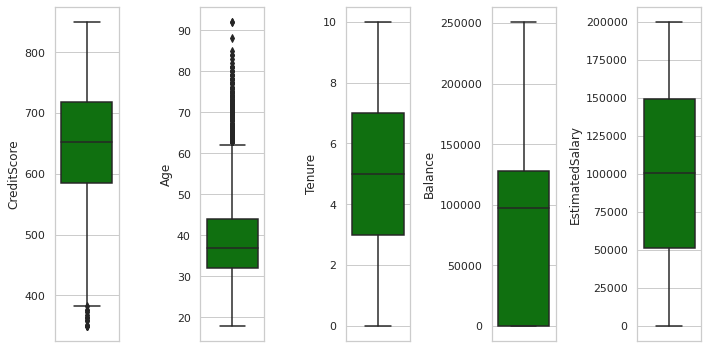

In [ ]:
plt.figure(figsize=(10,5))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

Based on the boxplot it can be seen that :
* Outliers are visible in the `CreditScore` and `Age` columns.
* The columns that appear to have a skewed distribution are the `Age`, `Balance`, and `CreditScore` columns. Next step, data will be transformed and handled outliers in pre-processing data.

### KDE plot

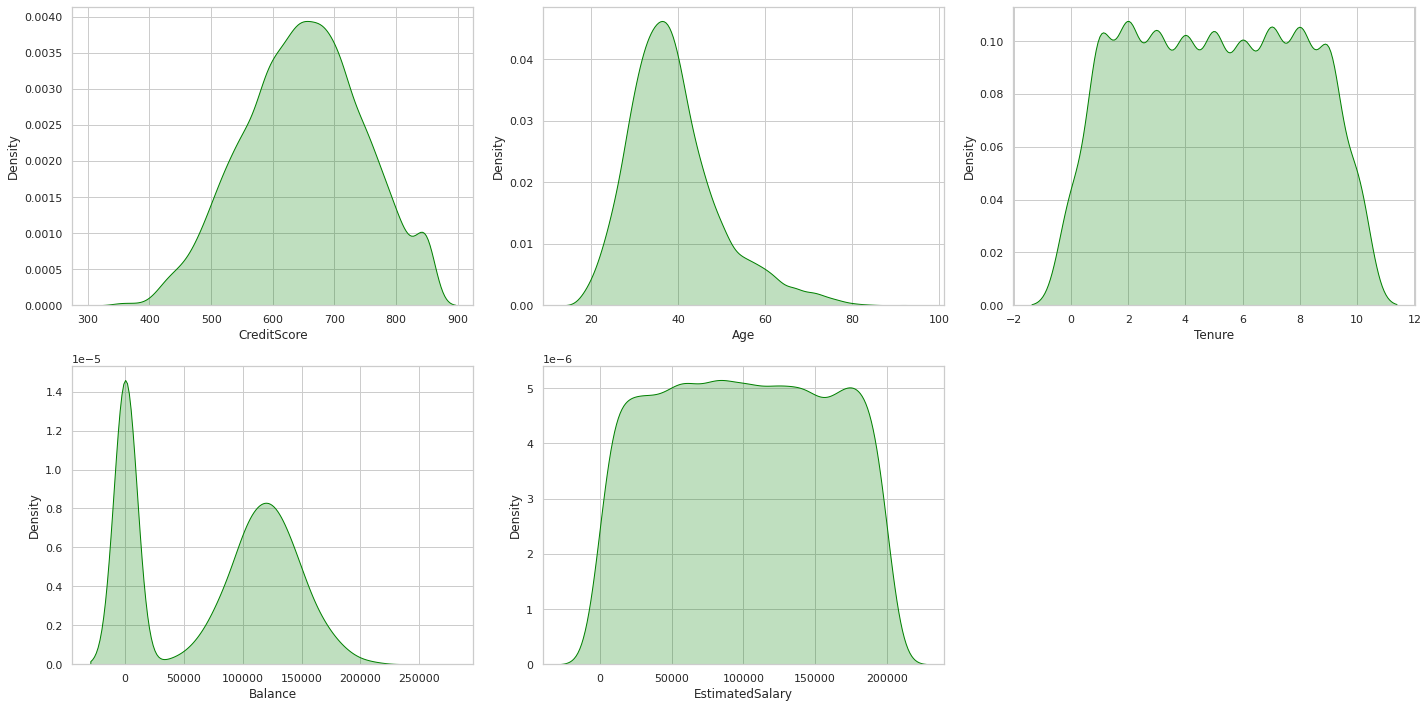

In [ ]:
features = nums
plt.figure(figsize=(20,10))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='green', shade=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. `CreditScore` looks symmetrical data distribution (*bell curve*). 
2. `Age` has a distribution that is right skewed.
3. `Balance`  has bimodal distribution data, while the `Tenure` and `EstimatedSalary` have uniform distribution data.
4. Overall, the column shows that the data distribution does not appear normal, so a statistical test will be carried out with Kolmogorov-Smirnov to test the normality of the data in the numeric columns.

## Kolmogorov-Smirnov (K-S test)

In [ ]:
#Kolmogorov-Smirnov statistical test to see the size of the normality of the data

# Interpretation
# If the P-value of the KS Test is larger than 0.05, we assume a normal distribution
# If the P-value of the KS Test is smaller than 0.05, we do not assume a normal distribution

for i in df[nums]:
  print(kstest(df[i], 'norm'))
  ks_statistic, ks_pvalue = kstest(df[i], 'norm')
  if ks_pvalue > 0.05:
    print(f'P-value {i}: {ks_pvalue}. So, we assume a normal distribution')
  else:
    print(f'P-value {i}: {ks_pvalue}. So, we do not assume a normal distribution')

KstestResult(statistic=1.0, pvalue=0.0)
P-value CreditScore: 0.0. So, we do not assume a normal distribution
KstestResult(statistic=1.0, pvalue=0.0)
P-value Age: 0.0. So, we do not assume a normal distribution
KstestResult(statistic=0.8324498680518208, pvalue=0.0)
P-value Tenure: 0.0. So, we do not assume a normal distribution
KstestResult(statistic=0.6383, pvalue=0.0)
P-value Balance: 0.0. So, we do not assume a normal distribution
KstestResult(statistic=1.0, pvalue=0.0)
P-value EstimatedSalary: 0.0. So, we do not assume a normal distribution


Based on the Kolmogorov-Smirnov test, all numeric columns don't have normal data distributions. For the next step, feature transformation will be carried out using Box-Cox on pre-processing data.

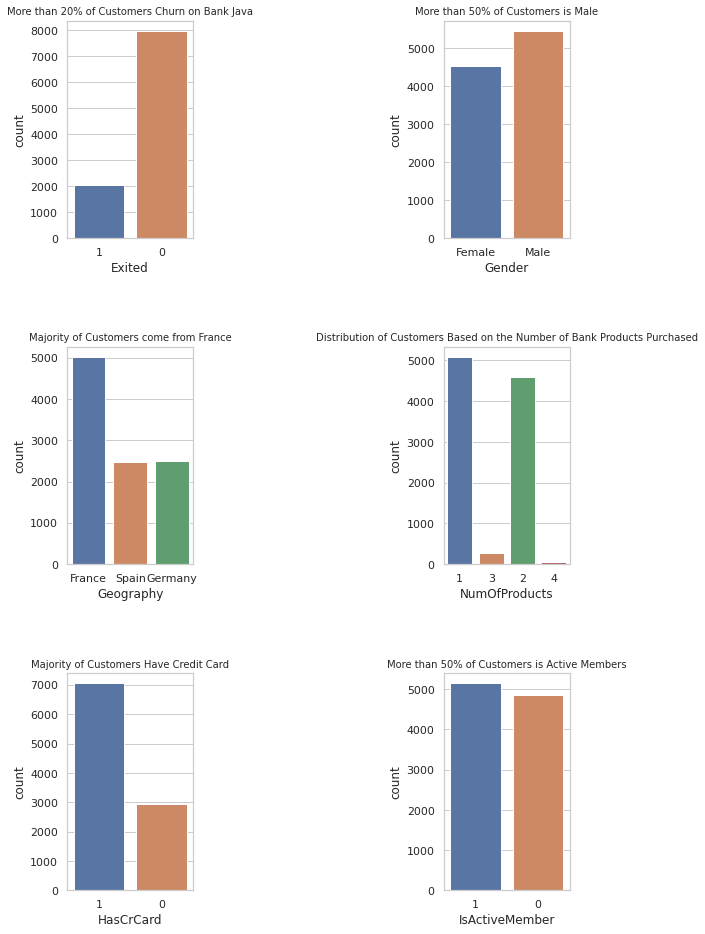

In [5]:
#Categorical columns data distribution

fig, axes = plt.subplots(3, 2, figsize=(9,16))
sns.countplot(x='Exited', data = df, ax=axes[0][0])
sns.countplot(x='Gender', data = df, ax=axes[0][1])
sns.countplot(x='Geography',data = df, ax=axes[1][0])
sns.countplot(x='NumOfProducts', data = df, ax=axes[1][1])
sns.countplot(x='HasCrCard', data = df, ax=axes[2][0])
sns.countplot(x='IsActiveMember',data = df, ax=axes[2][1])
plt.subplots_adjust(hspace = 0.5, wspace= 2.0)

axes[0][0].set_title('More than 20% of Customers Churn on Bank Java', fontsize = 10)
axes[0][1].set_title('More than 50% of Customers is Male', fontsize = 10);
axes[1][0].set_title('Majority of Customers come from France', fontsize = 10)
axes[1][1].set_title('Distribution of Customers Based on the Number of Bank Products Purchased', fontsize = 10);
axes[2][0].set_title("Majority of Customers Have Credit Card", fontsize = 10)
axes[2][1].set_title('More than 50% of Customers is Active Members', fontsize = 10);


Based on the graph above, it can be concluded :

From all customers on Bank Java, there are more than 2000 (>20%) churn customers. Bank Java has the largest number of French customers when compared to customers based on Geography. There is no significant difference in the number of customers based on gender. For Credit Card ownership, it can be seen that most customers have credit cards. More than 50% of customers are active members. The average customers buys 1 or 2 bank products.

## Bivariate Analysis

### Heatmap Plot

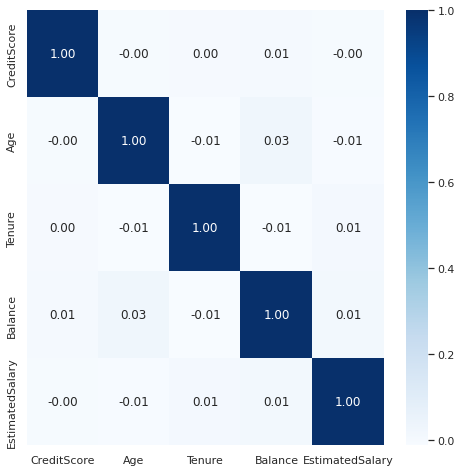

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

**Observation result :**

Based on the correlation heatmap, there is no positive correlation between the columns, so all of the columns above are likely to be used as features.

### Chi-square Statistical Test

(array([  5.05539429,   0.15004097, 118.19941432,  11.85325057,
        51.53992627]), array([2.45493956e-02, 6.98496209e-01, 1.56803624e-27, 5.75607838e-04,
       7.01557451e-13]))


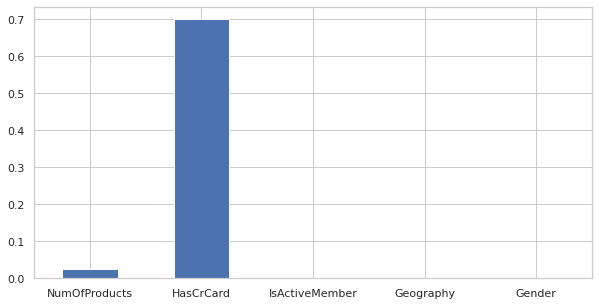

In [ ]:
#Chi-square categorical column
df_copy = df.copy()
cats = ['NumOfProducts','HasCrCard','IsActiveMember','Geography','Gender','Exited']

label_encoder = LabelEncoder()
df_copy['Geography'] = label_encoder.fit_transform(df_copy['Geography'])
df_copy['Gender'] = label_encoder.fit_transform(df_copy['Gender'])
X = df_copy[cats].drop('Exited',axis=1)
y = df_copy['Exited']
chi_scores = chi2(X,y)
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = X.columns)
plt.figure(figsize=(10,5))
p_values.plot.bar()
plt.xticks(rotation=0)
plt.show()

Based on the results of the chi-square test, the p-value in `HasCrCard` = 0.7 is greater than the alpha value = 0.05 means `HasCrCard` is an independent column from the target column. So, it is not recommended to be a feature and will be dropped later.

### Pair Plot

<Figure size 2880x720 with 0 Axes>

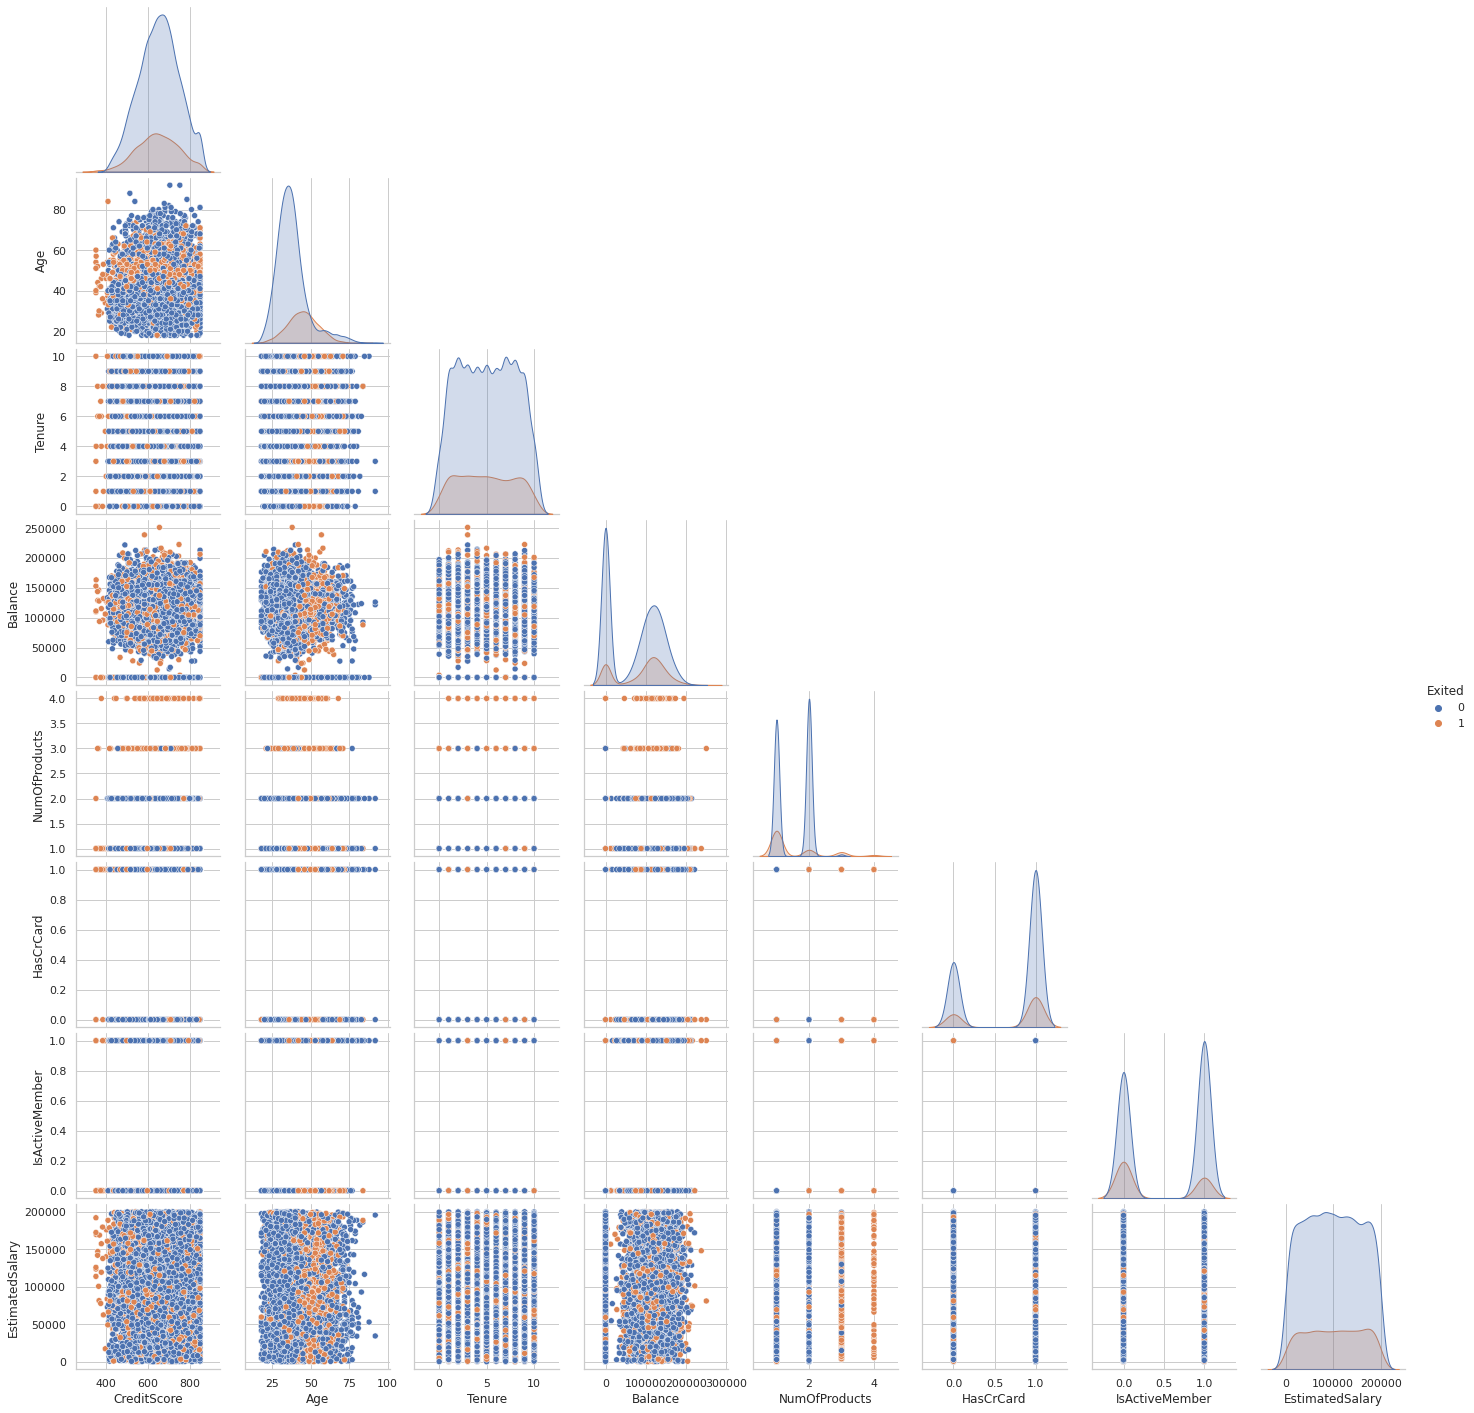

In [ ]:
feature = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited','Geography', 'Gender']
plt.figure(figsize=(40,10))
sns.pairplot(df[feature], hue='Exited', diag_kind='kde', corner=True)

Based on the results of the Pair Plot, there are several observations:

1. The more separate the Exited and Not Exited values in each column, the better it is to be used as a feature such as `Balance`, `EstimatedSalary`, `CreditScore`, and `Age` columns
2. Higher `EstimatedSalary` and `NumOfProduct`, higher the probability of customer churn
3. Higher `Balance` with `NumOfProduct`, higher the probability of customer churn
4. Higher `Tenure` with `NumOfProduct`, higher the probability of customer churn

### Count Plot by Exited

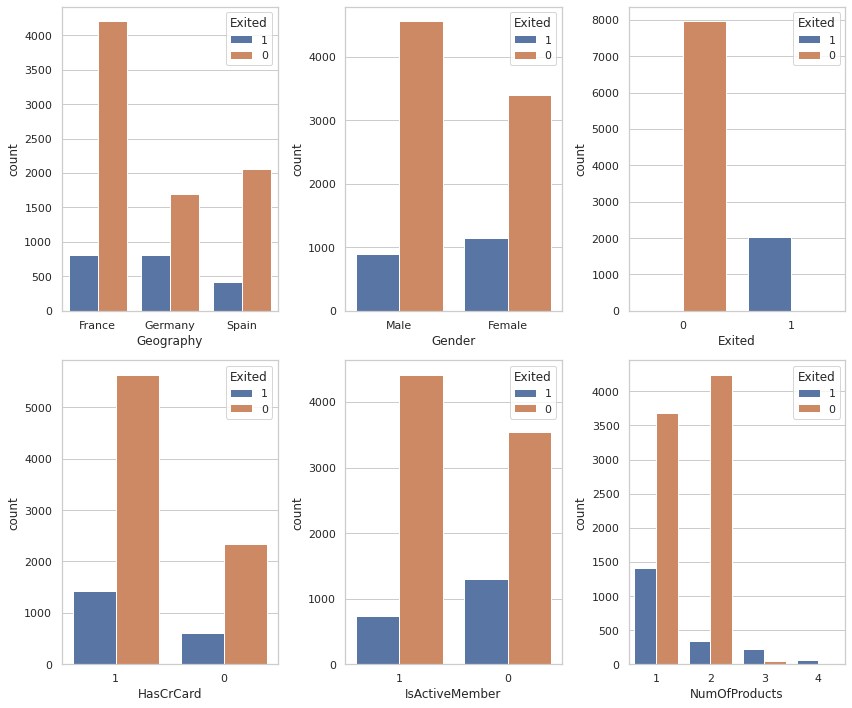

In [ ]:
plt.figure(figsize=(12,10))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1) 
    sns.countplot(data=df, x=features[i], hue='Exited', order=df[features[i]].value_counts().index)
    plt.tight_layout()
plt.show()

Based on the plot above, there are several observations:
1. The proportion of data on customers who were churn is higher for customers who only use 1 product. In comparison, the proportion of data for loyal customers is higher for customers who use 2 products.
2. The proportion of data on customers who were churn in  `HasCrCard` column is higher for customers who have credit cards.
3. Customers who were churn in the `IsActiveMember` column have a higher proportion of data on customers who are no longer active.
4. Loyal customers in the 'Geography' column have a higher proportion of data on France customers, while churn customers have a higher proportion of data on customers from France or Germany.
5. Loyal customers based on `Gender' are mostly male, while churn customers have a higher proportion of data on female customers.
6. In total, churn customers have a smaller proportion of data compared to loyal customers.

### Boxplot by Exited

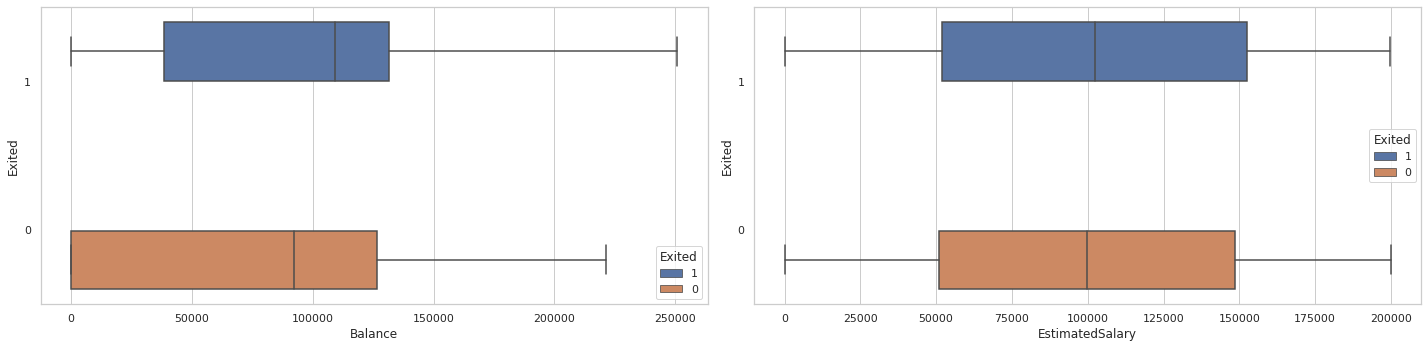

In [ ]:
column = ['Balance','EstimatedSalary']
plt.figure(figsize=(20,5))
for i in range(0, len(column)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, y='Exited', x=column[i], hue='Exited')
    plt.tight_layout()

Based on the boxplot, in the `Balance` column, customers who were churn are the customers who have a fairly high balance. Meanwhile, in `EstimatedSalary` there are no significant things in customer salary data that have an impact on the possibility of customers churn.

# Data Pre-Processing

## Drop Feature

In [ ]:
df = df.drop(columns=['RowNumber','CustomerId','Surname','HasCrCard'])
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
6172,568,Germany,Male,43,5,87612.64,4,1,107155.40,1
4247,637,Spain,Female,54,5,0.00,1,1,150836.98,0
8434,512,Germany,Male,41,7,122403.24,1,1,37439.90,1
760,600,France,Female,43,5,134022.06,1,0,194764.83,0
6318,738,Germany,Female,57,9,148384.64,1,0,155047.11,1


Dropping the columns that are not used as a feature for ML modeling such as `RowNumber`, `CustomerId`, `HasCrCard`, and `Surname`.

## Check Missing Values

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dataset does not have missing values

## Check Duplicated Data

In [ ]:
df.duplicated().sum()

0

Dataset does not have duplicated data

## Split Data Training & Testing

In [ ]:
# Split Feature and Label
X = df.drop('Exited', axis=1)
y = df['Exited'] # target / label

#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

## Box-Cox Transformation

Box-Cox transformation is a commonly used method for transforming a non-normally distributed dataset into a more normally distributed one. The basic idea behind this method is to find some value for λ such that the transformed data is as close to normally distributed as possible.

In [ ]:
X_train['Balance'] = X_train['Balance']+1
X_test['Balance'] = X_test['Balance']+1
X_train['Tenure'] = X_train['Tenure']+1
X_test['Tenure'] = X_test['Tenure']+1

pt = PowerTransformer(method='box-cox')
nums = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
X_train[nums] = pt.fit_transform(X_train[nums])
X_test[nums] = pt.transform(X_test[nums])
X_train.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,1.596501e-16,-2.037481e-15,-1.407763e-16,-8.437695e-17,-1.598721e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.005036e+00,-3.110194e+00,-1.930127e+00,-1.324886e+00,-2.196460e+00
25%,-6.982814e-01,-6.113929e-01,-6.411663e-01,-1.324886e+00,-7.793376e-01
50%,1.682279e-03,-3.515319e-02,6.286482e-02,6.845289e-01,9.389588e-02
75%,6.810951e-01,6.259968e-01,1.013912e+00,7.853073e-01,8.510006e-01
max,2.099536e+00,3.143511e+00,1.601569e+00,1.030829e+00,1.569707e+00


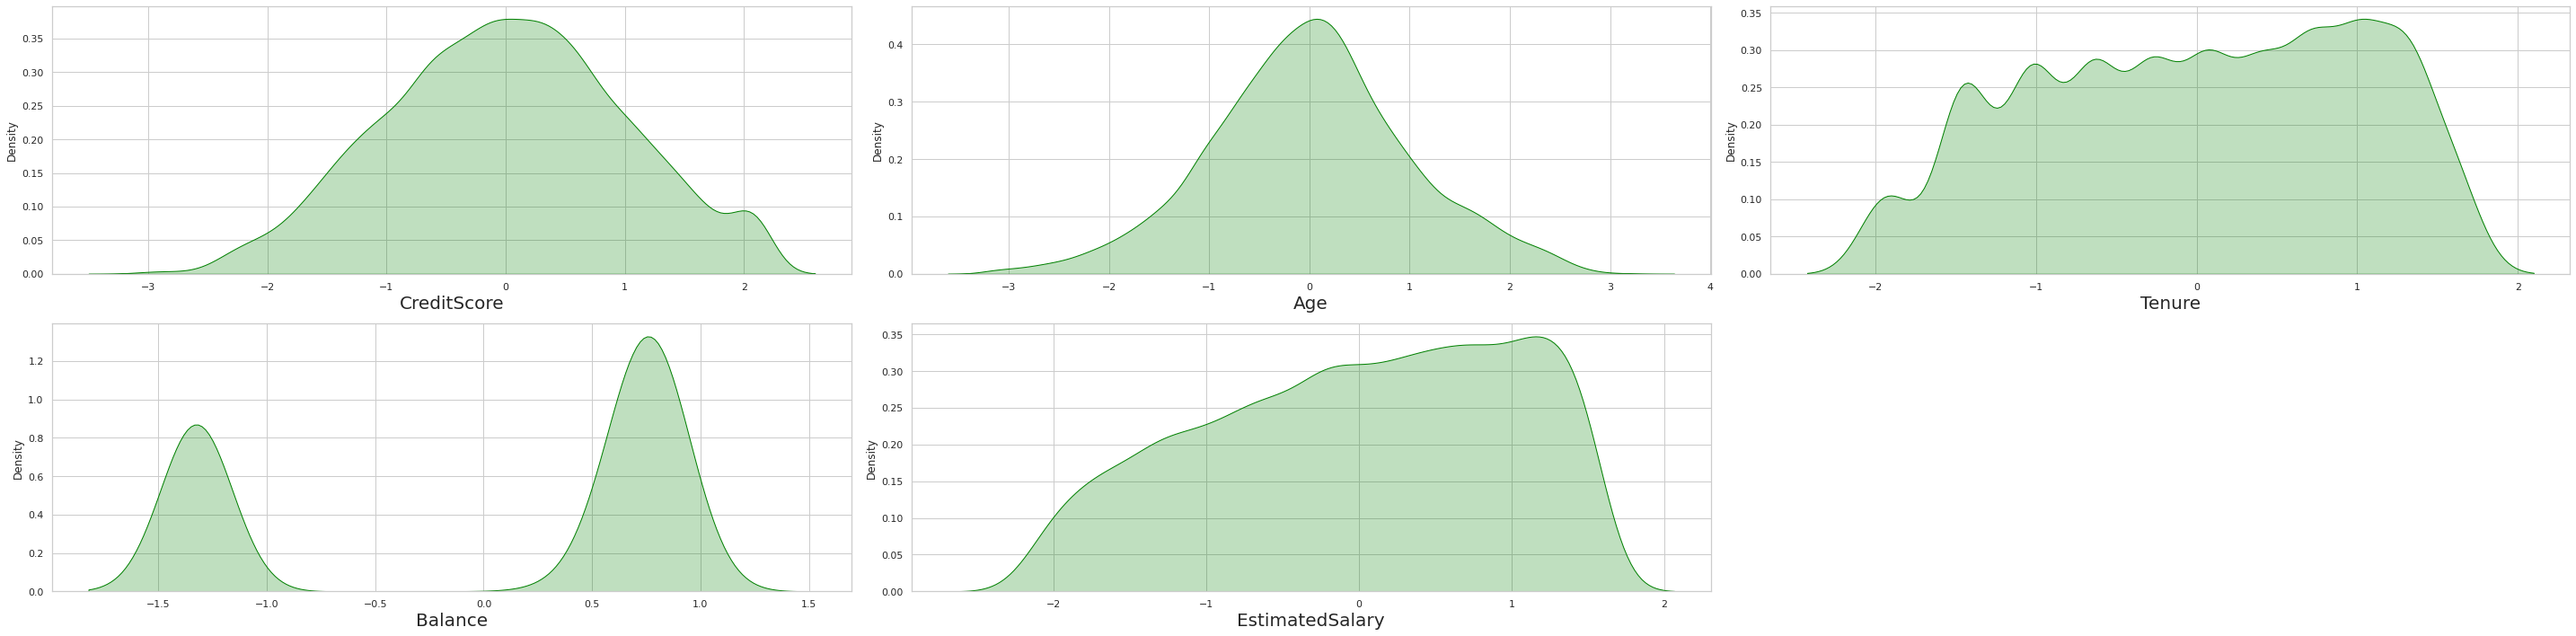

In [ ]:
#Visualization After using Box-Cox Transformation

features = nums
plt.figure(figsize=(40,10))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=X_train[features[i]], color='green', shade=True)
    plt.xlabel(features[i], size=20)
    plt.tight_layout()

**Observation:**

`CreditScore` and `Age` appear to be close to a normal distribution (shape similar to a bell curve). For the `Balance` column which has bimodal distribution data and the `Tenure` and `EstimatedSalary` column which has uniform distribution data, the results seem not close to the normal distribution. 


## Handle Outlier with Z-Score

In [ ]:
X_train['Exited']= y_train
print(f'Number of rows before filtering outliers: {len(X_train)}')

filtered_entries = np.array([True] * len(X_train))

for col in nums:
    zscore = abs(stats.zscore(X_train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
X_train = X_train[filtered_entries]

print(f'Number of rows after filtering outlier with z-score: {len(X_train)}')

Number of rows before filtering outliers: 8000
Number of rows after filtering outlier with z-score: 7976


In [ ]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000
mean,0.000569,0.004906,0.000523,0.000049,0.000289
std,0.998242,0.988984,0.999465,1.000016,1.000049
min,-2.929275,-2.859931,-1.930127,-1.324886,-2.196460
25%,-0.698281,-0.611393,-0.641166,-1.324886,-0.778301
50%,0.001682,-0.035153,0.062865,0.684529,0.093896
75%,0.681095,0.625997,1.013912,0.785186,0.851595
max,2.099536,2.857301,1.601569,1.030829,1.569707


In [ ]:
y_train = X_train[['Exited']]
X_train = X_train.drop(columns = ['Exited'])

## Feature Transformation - Standardization

In [ ]:
Standard = StandardScaler()
for i in nums:
    scaler = Standard.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [ ]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,7.976000e+03,7.976000e+03,7.976000e+03,7.976000e+03,7.976000e+03
mean,2.561197e-17,2.138042e-17,-6.948638e-17,-3.028893e-17,-1.848516e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.935189e+00,-2.896929e+00,-1.931804e+00,-1.324997e+00,-2.196778e+00
25%,-7.001249e-01,-6.232029e-01,-6.420726e-01,-1.324997e+00,-7.786007e-01
50%,1.115683e-03,-4.050829e-02,6.237951e-02,6.845115e-01,9.360804e-02
75%,6.817679e-01,6.280477e-01,1.013996e+00,7.851731e-01,8.513172e-01
max,2.102797e+00,2.884346e+00,1.602004e+00,1.030827e+00,1.569439e+00


In [ ]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.012129,-0.015881,-0.006293,-0.000695,0.027458
std,1.005223,1.013718,0.994549,1.002994,1.012965
min,-3.011088,-3.149995,-1.931804,-1.324997,-2.183933
25%,-0.720572,-0.623203,-1.027870,-1.324997,-0.752828
50%,-0.019672,-0.040508,0.062380,0.685906,0.134154
75%,0.692314,0.628048,0.707497,0.786033,0.904607
max,2.102797,2.922366,1.602004,1.051938,1.568590


## Feature Encoding

In [ ]:
cats_updated = ['Geography','Gender','IsActiveMember','NumOfProducts']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(X_train[col].value_counts())
  print('---'*10, '\n')
  print(X_test[col].value_counts())
  print('---'*10, '\n')

value counts of column Geography
France     3981
Germany    1999
Spain      1996
Name: Geography, dtype: int64
------------------------------ 

France     1021
Germany     504
Spain       475
Name: Geography, dtype: int64
------------------------------ 

value counts of column Gender
Male      4368
Female    3608
Name: Gender, dtype: int64
------------------------------ 

Male      1070
Female     930
Name: Gender, dtype: int64
------------------------------ 

value counts of column IsActiveMember
1    4104
0    3872
Name: IsActiveMember, dtype: int64
------------------------------ 

1    1032
0     968
Name: IsActiveMember, dtype: int64
------------------------------ 

value counts of column NumOfProducts
1    4057
2    3662
3     207
4      50
Name: NumOfProducts, dtype: int64
------------------------------ 

1    1013
2     918
3      59
4      10
Name: NumOfProducts, dtype: int64
------------------------------ 



Feature encoding:
*   `Geography` = One Hot Encoding
*   `Gender` = Label Encoding

In [ ]:
mapping_gender = {'Female': 0, 'Male': 1}
X_train['Gender'] = X_train['Gender'].map(mapping_gender)
X_test['Gender'] = X_test['Gender'].map(mapping_gender)

In [ ]:
onehots_train = pd.get_dummies(X_train['Geography'], prefix='Country', drop_first=True)
onehots_test = pd.get_dummies(X_test['Geography'], prefix='Country', drop_first=True)
X_train = X_train.join(onehots_train)
X_test = X_test.join(onehots_test)

**Feature Encoding**:

In feature encoding, the transformation of categorical values into numerical values is carried out because machine learning can only work with numerical values. There are two types of feature encoding :

*   One Hot Encoding for `Geography`. One Hot Encoding will divide the `Geography` column into new columns by prefixing the column names according to the prefix 'Country'. Also, 'drop_first = True' to avoid data multicollinearity.
*   Label Encoding for `Gender`. The mapping used is '0' for Female and '1' for Male.




In [ ]:
X_test.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Country_Germany,Country_Spain
3524,1.169130,France,0,-0.261069,0.707497,0.748555,2,1,0.179221,0,0
4502,0.481812,Spain,1,0.712674,0.062380,0.882216,1,0,0.754322,0,1
2312,-1.096906,France,0,1.447824,0.062380,-1.324997,1,0,-1.751267,0,0
6396,0.334996,Germany,0,0.628048,-1.027870,0.803003,2,1,-0.796152,1,0
4765,-0.227014,Spain,0,1.029115,-1.449150,-1.324997,2,1,1.057221,0,1


In [ ]:
X_train = X_train.drop(columns=['Geography'])
X_test = X_test.drop(columns=['Geography'])

**Drop Outdated Column**

At this stage, the original columns are dropped because the columns that will be used for machine learning are columns that have been feature transformation and feature encoding.

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Country_Germany,Country_Spain
2151,1.062798,1,1.574888,0.707497,-1.324997,1,0,1.008961,0,0
8392,0.914288,1,-0.623203,-0.642073,0.702957,1,0,-0.523860,1,0
5006,1.084047,0,-0.040508,-1.931804,0.742802,2,1,0.380852,1,0
4117,-0.934622,1,-0.040508,0.062380,-1.324997,2,0,-0.181477,0,0
7182,0.418836,1,1.029115,0.390911,0.731885,2,1,0.223757,1,0


## Feature Selection

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 2151 to 6206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7976 non-null   float64
 1   Gender           7976 non-null   int64  
 2   Age              7976 non-null   float64
 3   Tenure           7976 non-null   float64
 4   Balance          7976 non-null   float64
 5   NumOfProducts    7976 non-null   object 
 6   IsActiveMember   7976 non-null   object 
 7   EstimatedSalary  7976 non-null   float64
 8   Country_Germany  7976 non-null   uint8  
 9   Country_Spain    7976 non-null   uint8  
dtypes: float64(5), int64(1), object(2), uint8(2)
memory usage: 834.4+ KB


In [ ]:
#Change NumOfProduct, IsActiveMember, Exited dtypes to int

X_train[['NumOfProducts','IsActiveMember']] = X_train[['NumOfProducts','IsActiveMember']].astype(int)
X_test[['NumOfProducts','IsActiveMember']] = X_test[['NumOfProducts','IsActiveMember']].astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 2151 to 6206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7976 non-null   float64
 1   Gender           7976 non-null   int64  
 2   Age              7976 non-null   float64
 3   Tenure           7976 non-null   float64
 4   Balance          7976 non-null   float64
 5   NumOfProducts    7976 non-null   int64  
 6   IsActiveMember   7976 non-null   int64  
 7   EstimatedSalary  7976 non-null   float64
 8   Country_Germany  7976 non-null   uint8  
 9   Country_Spain    7976 non-null   uint8  
dtypes: float64(5), int64(3), uint8(2)
memory usage: 834.4 KB


# Modelling

The metrics used Recall and Compute Area Under the Receiver Operating Characteristic Curve (ROC-AUC) to minimize False Negative results in the Classification Model with cases of imbalanced data. In addition, the models used include Logistic Regression, Support Vector Classification (SVC), Decision Tree, Random Forest, and XGBoost

In [ ]:
LR = LogisticRegression(random_state=42)
SVC = SVC(random_state=42)
DTC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
XGB = XGBClassifier(random_state=42)

## SMOTE Oversampling


SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. One approach to addressing imbalanced datasets is to oversample the minority class such as SMOTE. The simplest approach by SMOTE involves duplicating examples in the minority class without add any new information to the model.

In [ ]:
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(12702, 10) (12702, 1)


## Cross Validation

### Recall Score

In [ ]:
LR_r = cross_validate(LR, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
SVC_r = cross_validate(SVC, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
DTC_r = cross_validate(DTC, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
RF_r = cross_validate(RF, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
XGB_r = cross_validate(XGB, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
LR_recall_train = LR_r['train_score'].mean()
LR_recall_test = LR_r['test_score'].mean()
SVC_recall_train = SVC_r['train_score'].mean()
SVC_recall_test = SVC_r['test_score'].mean()
DTC_recall_train = DTC_r['train_score'].mean()
DTC_recall_test = DTC_r['test_score'].mean()
RF_recall_train = RF_r['train_score'].mean()
RF_recall_test = RF_r['test_score'].mean()
XGB_recall_train = XGB_r['train_score'].mean()
XGB_recall_test = XGB_r['test_score'].mean()

results = pd.DataFrame([['Logistic Regression', LR_recall_train, LR_recall_test],
                        ['SVC', SVC_recall_train, SVC_recall_test], 
                        ['Decision Tree', DTC_recall_train, DTC_recall_test],
                        ['Random Forest', DTC_recall_train, DTC_recall_test],
                        ['XGBoost', XGB_recall_train, XGB_recall_test]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)

,Models,Training Score,Testing Score
2,Decision Tree,1.000000,0.826022
3,Random Forest,1.000000,0.826022
4,XGBoost,0.850418,0.814685
1,SVC,0.813101,0.802711
0,Logistic Regression,0.727602,0.722881


Based on the results of cross-validation on the Recall metrics, the best value obtained by the XGBoost model with a training score of 0.850418 and a test score of 0.814685. The Decision Tree and Random Forest models have high results, but the distance between the training score and the test score is more than 10%, which means the result is overfitting.

### ROC-AUC Score

In [ ]:
LR_auc = cross_validate(LR, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
SVC_auc = cross_validate(SVC, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
DTC_auc = cross_validate(DTC, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
RF_auc = cross_validate(RF, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
XGB_auc = cross_validate(XGB, X_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
LR_auc_train = LR_auc['train_score'].mean()
LR_auc_test = LR_auc['test_score'].mean()
SVC_auc_train = SVC_auc['train_score'].mean()
SVC_auc_test = SVC_auc['test_score'].mean()
DTC_auc_train = DTC_auc['train_score'].mean()
DTC_auc_test = DTC_auc['test_score'].mean()
RF_auc_train = RF_auc['train_score'].mean()
RF_auc_test = RF_auc['test_score'].mean()
XGB_auc_train = XGB_auc['train_score'].mean()
XGB_auc_test = XGB_auc['test_score'].mean()

results = pd.DataFrame([['Logistic Regression', LR_auc_train, LR_auc_test],
                        ['SVC', SVC_auc_train, SVC_auc_test], 
                        ['Decision Tree', DTC_auc_train, DTC_auc_test],
                        ['Random Forest', DTC_auc_train, DTC_auc_test],
                        ['XGBoost', XGB_auc_train, XGB_auc_test]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)

,Models,Training Score,Testing Score
2,Decision Tree,1.000000,0.819560
3,Random Forest,1.000000,0.819560
4,XGBoost,0.935720,0.920341
1,SVC,0.893980,0.880818
0,Logistic Regression,0.795823,0.793577


The results of cross-validation for ROC-AUC increased in the XGBoost model with a training score of 0.935720 and a test score of 0.920341. In addition, the Decision Tree and Random Forest models are still overfitting

### Overall Scores

In [ ]:
def eval_classification_smote(model): 
  # Prediction
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_smote)
  
  # Test Score
    print('Scoring')
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
    print('Precision (Train): %.2f' % precision_score(y_train_smote, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
    print('Recall (Train): %.2f' % recall_score(y_train_smote, y_pred_train))
    print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
    print('F1 (Train): %.2f' % f1_score(y_train_smote, y_pred_train))
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:,1]))
    print('Test Score: %.2f' % model.score(X_test, y_test))
    print('Train Score: %.2f' % model.score(X_train_smote, y_train_smote))
  

In [ ]:
# Model Logistic Regression
LR.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(LR)

Scoring
Accuracy (Test): 0.71
Accuracy (Train): 0.72
Precision (Test): 0.39
Precision (Train): 0.72
Recall (Test): 0.70
Recall (Train): 0.73
F1 (Test): 0.50
F1 (Train): 0.72
AUC (Test Proba): 0.78
AUC (Train Proba): 0.80
Test Score: 0.71
Train Score: 0.72


In [ ]:
# Model SVC
from sklearn.svm import SVC
SVC = SVC(probability = True)
SVC.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(SVC)

Scoring
Accuracy (Test): 0.79
Accuracy (Train): 0.81
Precision (Test): 0.48
Precision (Train): 0.81
Recall (Test): 0.73
Recall (Train): 0.81
F1 (Test): 0.58
F1 (Train): 0.81
AUC (Test Proba): 0.84
AUC (Train Proba): 0.90
Test Score: 0.79
Train Score: 0.81


In [ ]:
# Model Decision Tree
DTC.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(DTC)

Scoring
Accuracy (Test): 0.77
Accuracy (Train): 1.00
Precision (Test): 0.44
Precision (Train): 1.00
Recall (Test): 0.55
Recall (Train): 1.00
F1 (Test): 0.49
F1 (Train): 1.00
AUC (Test Proba): 0.69
AUC (Train Proba): 1.00
Test Score: 0.77
Train Score: 1.00


In [ ]:
# Model Random Forest
RF.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(RF)

Scoring
Accuracy (Test): 0.83
Accuracy (Train): 1.00
Precision (Test): 0.58
Precision (Train): 1.00
Recall (Test): 0.59
Recall (Train): 1.00
F1 (Test): 0.59
F1 (Train): 1.00
AUC (Test Proba): 0.85
AUC (Train Proba): 1.00
Test Score: 0.83
Train Score: 1.00


In [ ]:
# Model XGBoost
XGB.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(XGB)

Scoring
Accuracy (Test): 0.83
Accuracy (Train): 0.86
Precision (Test): 0.57
Precision (Train): 0.87
Recall (Test): 0.69
Recall (Train): 0.85
F1 (Test): 0.62
F1 (Train): 0.86
AUC (Test Proba): 0.87
AUC (Train Proba): 0.94
Test Score: 0.83
Train Score: 0.86


## Hyperparameter Tuning


### Logistic Regression

In [ ]:
pipeline = Pipeline([
        ('params', LR)
        ])

param = {'params__C': [0.1,0.5,1.0],
 'params__penalty': ['l1','l2','none'],
 'params__solver': ['newton-cg','saga','sag']}

LR_tune = GridSearchCV(estimator=pipeline,
                       param_grid=param,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=4,
                       verbose=1)

LR_tune.fit(X_train_smote, y_train_smote)

eval_classification_smote(LR_tune)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Scoring
Accuracy (Test): 0.71
Accuracy (Train): 0.72
Precision (Test): 0.39
Precision (Train): 0.72
Recall (Test): 0.70
Recall (Train): 0.72
F1 (Test): 0.50
F1 (Train): 0.72
AUC (Test Proba): 0.78
AUC (Train Proba): 0.80
Test Score: 0.78
Train Score: 0.80


### SVC

In [ ]:
pipeline = Pipeline([
        ('params', SVC)
    ])

param = {'params__C': [1, 2],
         'params__gamma': ['scale', 'auto'],
         'params__kernel': ['rbf', 'poly'],
        }

SVC_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc',
                          cv=4, 
                          n_jobs=-1, 
                          verbose=1
                          )

SVC_tune.fit(X_train_smote, y_train_smote)

eval_classification_smote(SVC_tune)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Scoring
Accuracy (Test): 0.78
Accuracy (Train): 0.82
Precision (Test): 0.48
Precision (Train): 0.82
Recall (Test): 0.72
Recall (Train): 0.83
F1 (Test): 0.58
F1 (Train): 0.82
AUC (Test Proba): 0.84
AUC (Train Proba): 0.90
Test Score: 0.84
Train Score: 0.90


### Decision Tree

In [ ]:
pipeline = Pipeline([
        ('params', DTC)
    ])

param = {
         'params__max_depth': [400, 500],
         'params__max_features': ['auto', 'sqrt'],
         'params__min_samples_leaf': [3,5,7],
         'params__min_samples_split': [1,2,3]
        }

DTC_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc',
                          cv=4, 
                          n_jobs=-1, 
                          verbose=1
                          )

DTC_tune.fit(X_train_smote, y_train_smote)

eval_classification_smote(DTC_tune)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Scoring
Accuracy (Test): 0.76
Accuracy (Train): 0.88
Precision (Test): 0.44
Precision (Train): 0.88
Recall (Test): 0.58
Recall (Train): 0.87
F1 (Test): 0.50
F1 (Train): 0.88
AUC (Test Proba): 0.76
AUC (Train Proba): 0.96
Test Score: 0.76
Train Score: 0.96


### Random Forest

In [ ]:
pipeline = Pipeline([
        ('params', RF)
    ])

param = {'params__max_depth': [4, 5],
         'params__max_features': ['auto', 'sqrt'],
         'params__min_samples_leaf': [3,4,5],
         'params__min_samples_split': [3,4,5]
        }

RF_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc',
                          cv=4, 
                          n_jobs=-1, 
                          verbose=1
                          )

RF_tune.fit(X_train_smote, y_train_smote)

eval_classification_smote(RF_tune)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Scoring
Accuracy (Test): 0.79
Accuracy (Train): 0.80
Precision (Test): 0.49
Precision (Train): 0.82
Recall (Test): 0.73
Recall (Train): 0.78
F1 (Test): 0.59
F1 (Train): 0.80
AUC (Test Proba): 0.85
AUC (Train Proba): 0.88
Test Score: 0.85
Train Score: 0.88


### XGBoost

In [ ]:
pipeline = Pipeline([
        ('params', XGB)
        ])

param = {'params__min_child_weight': [4, 5],
        'params__gamma': [4, 5],
        'params__subsample': [0.8, 1.0],
        'params__colsample_bytree': [0.8, 1.0],
        'params__max_depth': [4, 5]}

XGB_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc', 
                          n_jobs=-1,
                          cv=4, 
                          verbose=1)

XGB_tune.fit(X_train_smote, y_train_smote)

eval_classification_smote(XGB_tune)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Scoring
Accuracy (Test): 0.85
Accuracy (Train): 0.90
Precision (Test): 0.64
Precision (Train): 0.92
Recall (Test): 0.64
Recall (Train): 0.89
F1 (Test): 0.64
F1 (Train): 0.90
AUC (Test Proba): 0.87
AUC (Train Proba): 0.97
Test Score: 0.87
Train Score: 0.97


## Model Evaluation

### Logistic Regression

Fitting 4 folds for each of 27 candidates, totalling 108 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

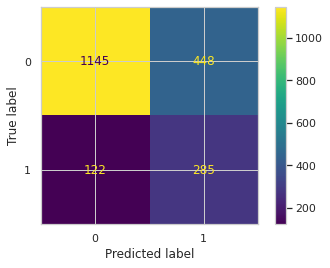

In [ ]:
LR_matrix = LR_tune.fit(X_train_smote, y_train_smote)
y_pred = LR_tune.predict(X_test)
y_pred_train = LR_tune.predict(X_train_smote)
plot_confusion_matrix(LR_matrix, X_test, y_test)
plot_confusion_matrix

### SVC

Fitting 4 folds for each of 8 candidates, totalling 32 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

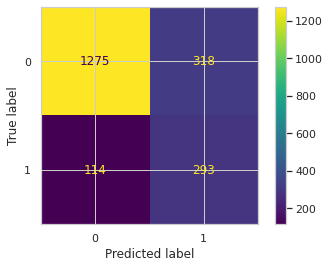

In [ ]:
SVC_matrix = SVC_tune.fit(X_train_smote, y_train_smote)
y_pred = SVC_tune.predict(X_test)
y_pred_train = SVC_tune.predict(X_train_smote)
plot_confusion_matrix(SVC_matrix, X_test, y_test)
plot_confusion_matrix

### Decision Tree

Fitting 4 folds for each of 36 candidates, totalling 144 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

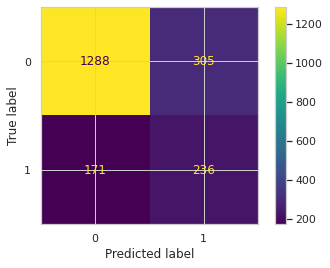

In [ ]:
DTC_matrix = DTC_tune.fit(X_train_smote, y_train_smote)
y_pred = DTC_tune.predict(X_test)
y_pred_train = DTC_tune.predict(X_train_smote)
plot_confusion_matrix(DTC_matrix, X_test, y_test)
plot_confusion_matrix

### Random Forest

Fitting 4 folds for each of 36 candidates, totalling 144 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

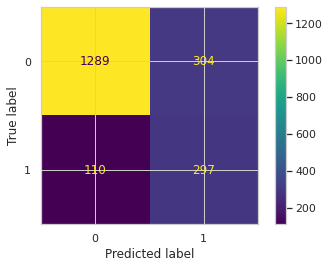

In [ ]:
RF_matrix = RF_tune.fit(X_train_smote, y_train_smote)
y_pred = RF_tune.predict(X_test)
y_pred_train = RF_tune.predict(X_train_smote)
plot_confusion_matrix(RF_matrix, X_test, y_test)
plot_confusion_matrix

### XGBoost

Fitting 4 folds for each of 32 candidates, totalling 128 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

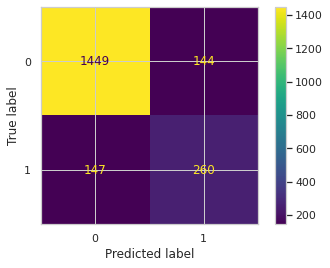

In [ ]:
XGB_matrix = XGB_tune.fit(X_train_smote, y_train_smote)
y_pred = XGB_tune.predict(X_test)
y_pred_train = XGB_tune.predict(X_train_smote)
plot_confusion_matrix(XGB_matrix, X_test, y_test)
plot_confusion_matrix

### ROC AUC Curve

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best Threshold=0.390464, G-Mean=0.789


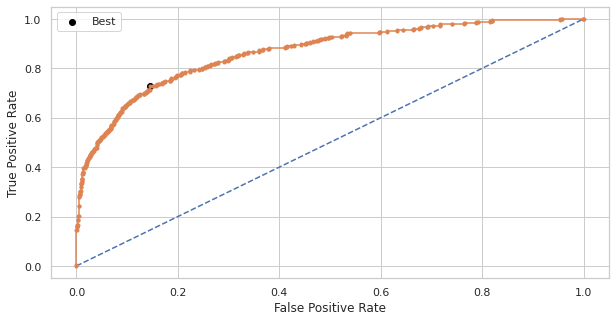

In [ ]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# fit a model
XGB_curve = XGB_tune.fit(X_train_smote, y_train_smote)
# predict probabilities
y_pred = XGB_curve.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10,5))
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The ROC AUC curve aims to measure classification performance by referring to the threshold between *True Positive Rate* (TPR) and *False Positive Rate* (FPR). The higher the TPR and the lower the FPR, the better the results with the visualization of the curve to the left. The visualization results above show that the best threshold value is 0.390464.

### Confusion Matrix (Best Threshold)

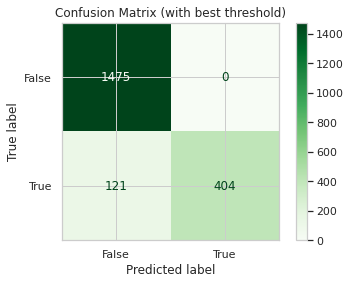

In [ ]:
clf = XGB_matrix  
# y_pred = clf.predict(X_test) # default threshold is 0.5 
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.390464).astype(bool)
y_pred

fig = plot_confusion_matrix(clf, X_test, y_pred, cmap='Greens') 
plt.title('Confusion Matrix (with best threshold)') 
plt.show()

After getting the best threshold value from the ROC-AUC curve, then re-evaluating the model with the Confusion Matrix using a threshold number of 0.390464. The result is True Positive increased to 404 and False Negative decreased to 0, as well as False Positive to 121.

### Prediction Result
 

In [ ]:
LR_score = cross_validate(LR_tune, X_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
LR_train_score = LR_score['train_score'].mean()
LR_test_score = LR_score['test_score'].mean()
SVC_score = cross_validate(SVC_tune, X_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
SVC_train_score = SVC_score['train_score'].mean()
SVC_test_score = SVC_score['test_score'].mean()
DTC_score = cross_validate(DTC_tune, X_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
DTC_train_score = DTC_score['train_score'].mean()
DTC_test_score = DTC_score['test_score'].mean()
RF_score = cross_validate(RF_tune, X_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
RF_train_score = RF_score['train_score'].mean()
RF_test_score = RF_score['test_score'].mean()
XGB_score = cross_validate(XGB_tune, X_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
XGB_train_score = XGB_score['train_score'].mean()
XGB_test_score = XGB_score['test_score'].mean()

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds 

In [ ]:
results = pd.DataFrame([['Logistic Regression', LR_train_score, LR_test_score],
                        ['SVC', SVC_train_score, SVC_test_score], 
                        ['Decision Tree', DTC_train_score, DTC_test_score],
                        ['Random Forest', RF_train_score, RF_test_score],
                        ['XGBoost', XGB_train_score, XGB_test_score]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)

,Models,Training Score,Testing Score
4,XGBoost,0.965325,0.949607
2,Decision Tree,0.960518,0.869175
1,SVC,0.902056,0.885536
3,Random Forest,0.886964,0.876917
0,Logistic Regression,0.795835,0.793616


After getting the results of the evaluation model through the Confusion Matrix, the best model for predicting customers who will churn is obtained by the XGBoost model and ROC-AUC metrics with a test score of 0.949607.

## Feature Importance

### SHapley Additive exPlanations (SHAP)

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.

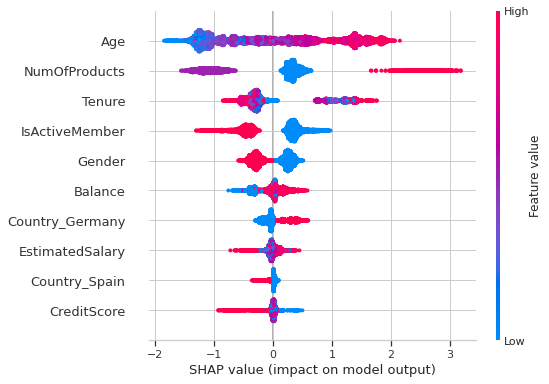

In [ ]:
model = XGBClassifier(min_child_weight = 4,
                      gamma= 4,
                      subsample= 1.0,
                      colsample_bytree= 0.8,
                      max_depth = 4)
model.fit(X_train_smote,y_train_smote)

shap_values = shap.TreeExplainer(model).shap_values(X_train_smote)
shap.summary_plot(shap_values,X_train_smote)

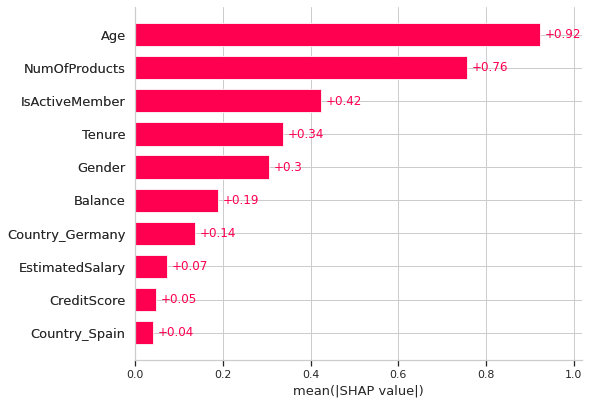

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

## Business Recommendation

Some business recommendations that can be made for Bank Java to handle customer churn are based on the 3 most influential features which are `Age`, `NumOfProducts`, and `IsActiveMember`:

*   **Improved service quality at Branch of Bank**
    
    According to research from the OECD [(OECD, 2020: 41)](https://www.oecd.org/daf/fin/financial-education/Financial-Consumer-Protection-and-Ageing-Populations.pdf), the majority of older customers prefer to visit the branch rather than use the bank's online or telephone services. It means good service quality is needed, especially from Frontliners at the branch to be able to communicate and provide the best service to customers.
*   **Cross-Selling according to Customers' needs**

   Banks can do cross-selling based on customer needs, for example in the older customer segment offering products that meet investment or retirement needs. Meanwhile, for the young customer segment, banks can provide products based on educational needs or home purchases [(Deloitte, 2013: 9)](https://www2.deloitte.com/content/dam/Deloitte/us/Documents/financial-services/us-kickingitupanotch-092614.pdf). The cross-selling method can be performed by Telemarketing and Frontliners at the branch. In addition, cross-selling can be performed for existing customer segments with a success rate of 60 to 70% [(Investopedia, 2022)](https://www.investopedia.com/terms/c/cross-sell.asp). So the cross-selling method can solve the problem of customers who were churn on inactive customers and only 1 product purchased.

